In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


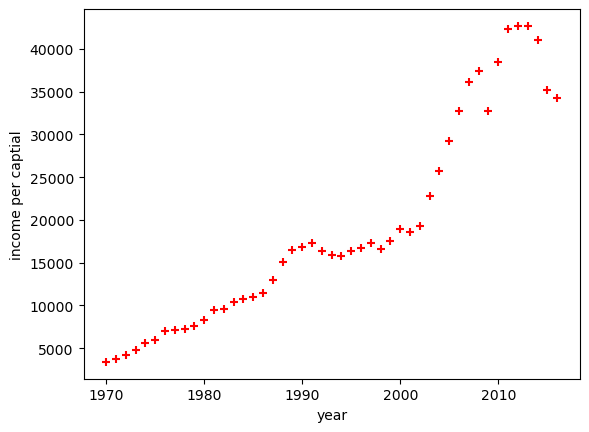

In [7]:
plt.scatter(df.year,df['per capita income (US$)'], color ='red',marker='+')
plt.xlabel('year')
plt.ylabel('income per captial')
plt.show()

In [8]:
new_df = df.drop('per capita income (US$)', axis='columns')
new_df.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [9]:
income_per_capital = df['per capita income (US$)']
income_per_capital.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [10]:
# create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,income_per_capital)

LinearRegression()

## predict income in specific year

In [11]:
pred = reg.predict([[2002]])

/home/vel/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
reg.coef_

array([828.46507522])

In [13]:
reg.intercept_

-1632210.7578554575

Y = m *X + b (m is coefficient and b is intercept)

In [14]:
2002*828.46507522 + -1632210.7578554575

26376.322734982474

# Generate csv file with list predicted income per capital specific year

In [15]:
df.loc[32,'pred_income_per_capita'] = pred

In [25]:
df['pred_income_per_capita'].fillna(False).head()

0    False
1    False
2    False
3    False
4    False
Name: pred_income_per_capita, dtype: object

In [26]:
df

,year,per capita income (US$),pred_income_per_capita
0,1970,3399.299037,False
1,1971,3768.297935,False
2,1972,4251.175484,False
3,1973,4804.463248,False
4,1974,5576.514583,False
5,1975,5998.144346,False
6,1976,7062.131392,False
7,1977,7100.126170,False
8,1978,7247.967035,False
9,1979,7602.912681,False


In [27]:
df.to_csv('predicted_income.csv')
print(f'saved a predicted_income.csv')

saved a predicted_income.csv
